In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 12):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-09-17 15:21:45--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.144.18
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.144.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  22.5MB/s    in 1.3s    

2022-09-17 15:21:47 (22.5 MB/s) - ‘images.zip’ saved [29586716/29586716]



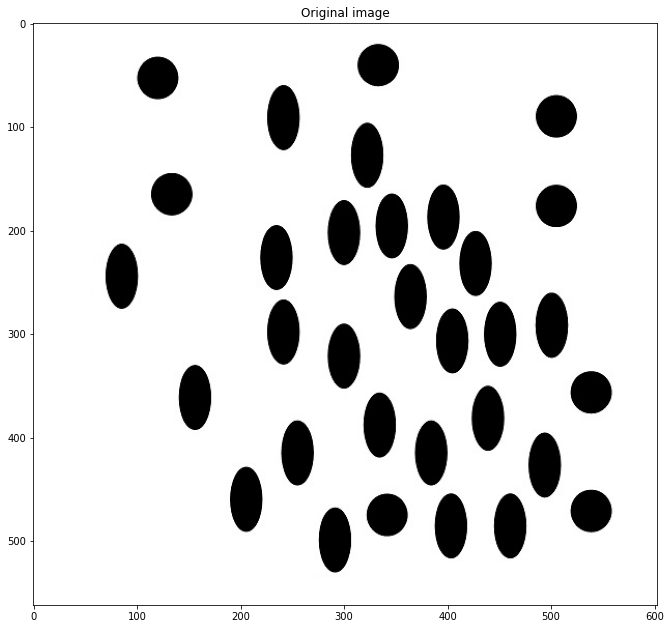

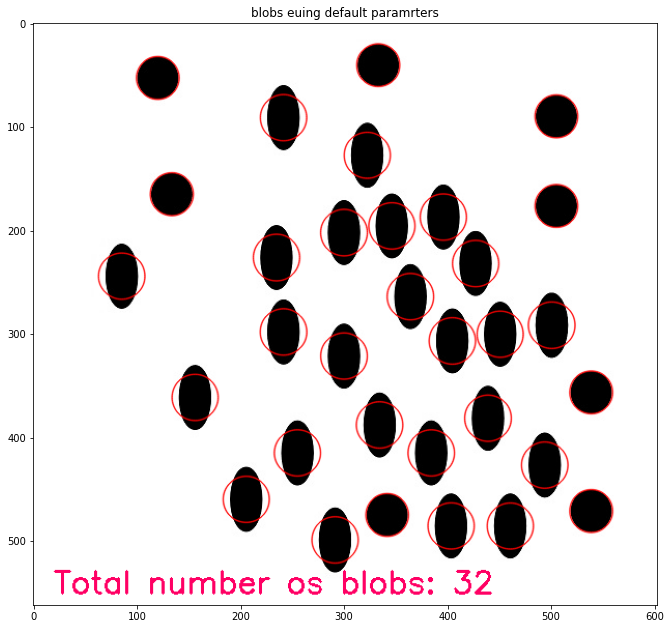

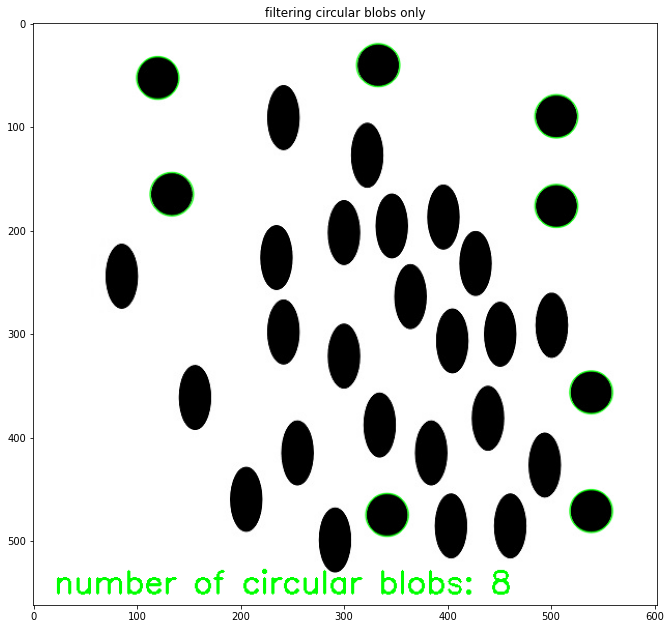

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('/content/images/blobs.jpg')
imshow('Original image', image)

detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(image)

blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image , keypoints ,blank, (0,0,255), 
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Total number os blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20,550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100,0,255), 2)

imshow('blobs euing default paramrters', blobs)

params = cv2.SimpleBlobDetector_Params()

params.filterByArea   = True
params.minArea = 100

params.filterByCircularity = True
params.minCircularity = 0.9

params.filterByConvexity = True
params.minInertiaRatio = 0.2

params.filterByInertia = True
params.minConvexity = 0.01

detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(image)

blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank , (0,255,0),
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = 'number of circular blobs: ' + str(len(keypoints))
cv2.putText(blobs , text, (20,550), cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0),2)
imshow('filtering circular blobs only', blobs)

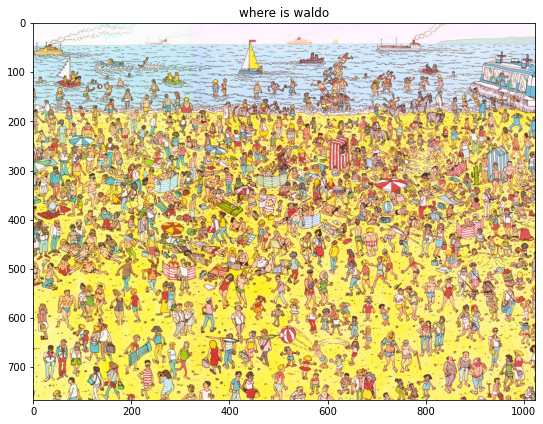

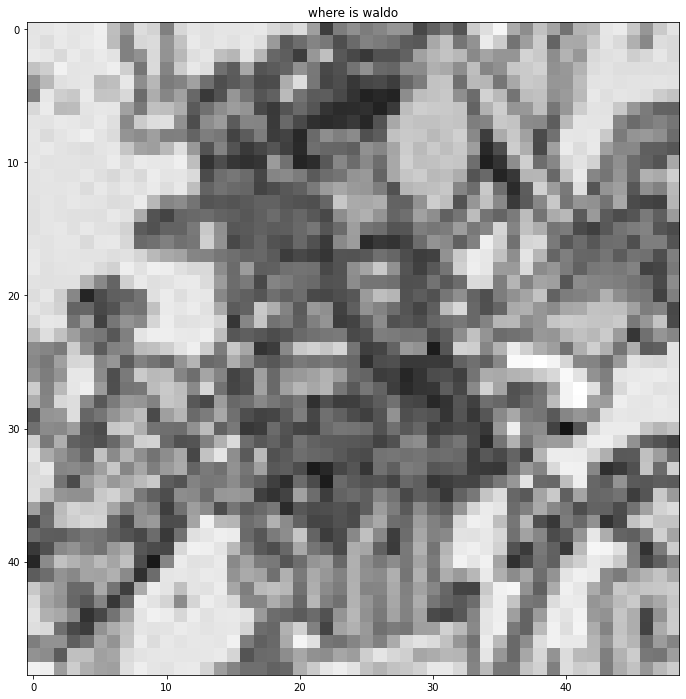

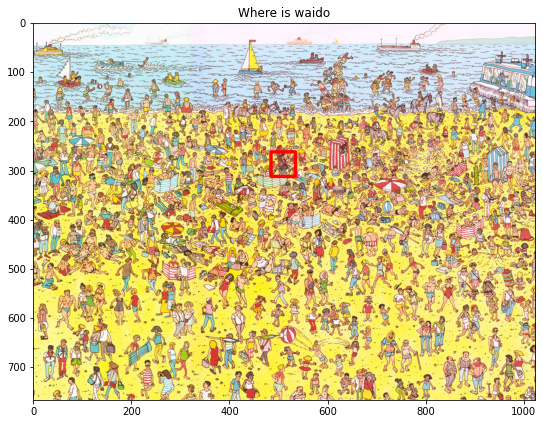

In [19]:
image = cv2.imread('/content/images/WaldoBeach.jpg')
imshow('where is waldo', image)
gray = cv2.cvtColor(image , cv2.COLOR_RGB2GRAY)

template = cv2.imread('/content/images/waldo.jpg',0)
imshow('where is waldo', template)

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)

imshow('Where is waido', image)